# Baseline Model
Creation of a baseline model based on a pretrained model on imagenet to check
its performance on our current dataset.

## Imports
Importing all needed libraries

In [1]:
import pandas as pd
import numpy as np
# labels: integer labels of the class each image belongs
# oh_labels: one-hot labels of the class each image belongs
# params: the parameters of the model
from parameters import labels, oh_labels, params
import utils
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt

Main module did not execute


## Preprocessing Steps

In [2]:
# Reorder the labels by taking into account the alphanumeric file order of the images.
# Needed preprocessing step to use tf.keras.utils.image_dataset_from_directory.
labels_list = utils.reorder_image_labels(params['image_path'], labels.iloc[:, 0].tolist(), index_start=1)

In [3]:
data_dir = pathlib.Path(params['image_path'])
list_ds = tf.data.Dataset.list_files(str(data_dir/'*'), shuffle=False)

In [4]:
for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\1.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\10.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\100.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\101.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\102.jpg'


In [5]:
class_names = ['High Risk', 'Superficial', 'Low Risk']

In [6]:
val_size = int(len(list_ds) * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [7]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

674
168


In [81]:
def get_label(file_path, labels):

  # Convert the path to a list of path components

  print(tf.strings.split(file_path, os.path.sep)[0])
  # label_index = utils.get_stemmed_filename(str(file_path), int) - 1

  return file_path # labels[label_index]

def decode_img(img, img_size):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, img_size)

def wrap_get_label(file_path, labels):
  return tf.numpy_function(get_label, [file_path, labels], [tf.string])

def process_path(file_path, labels, img_size):
  label = get_label(file_path, labels)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img, img_size)
  return img, label

In [82]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(lambda x: process_path(x, labels.iloc[:, 0].tolist(), ['IMG_SIZE']), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x: process_path(x, labels.iloc[:, 0].tolist(), params['IMG_SIZE']), num_parallel_calls=tf.data.AUTOTUNE)

AttributeError: in user code:

    File "C:\Users\dimka\AppData\Local\Temp\ipykernel_28908\2567199788.py", line 2, in None  *
        lambda x: process_path(x, labels.iloc[:, 0].tolist(), ['IMG_SIZE'])
    File "C:\Users\dimka\AppData\Local\Temp\ipykernel_28908\2451090681.py", line 20, in process_path  *
        label = get_label(file_path, labels)
    File "C:\Users\dimka\AppData\Local\Temp\ipykernel_28908\1936822516.py", line 5, in get_label  *
        print(tf.strings.split(file_path, os.path.sep)[0].numpy())

    AttributeError: 'Tensor' object has no attribute 'numpy'


In [32]:
process_path(train_ds.get_single_element(), labels.iloc[:, 0].tolist(), ['IMG_SIZE'])

InvalidArgumentError: Dataset had more than one element. [Op:DatasetToSingleElement]

In [93]:
np.str_(f)[0]

't'

In [48]:
f = train_ds.take(1).get_single_element()

In [22]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  0


InvalidArgumentError: Index out of range using input dim 0; input has only 0 dims [Op:StridedSlice] name: strided_slice/

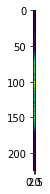

In [24]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [30]:
# int(pathlib.Path('C:/Users/dimka/Documents/Dermoscopy_Dataset/datasets/All BCC/100.jpg').stem)

def get_filename_wo_extension(filaname, cast_type=None):
  if cast_type is None:
    return pathlib.Path(filaname).stem
  else:
    return cast_type(pathlib.Path(filaname).stem)

In [34]:
print(get_filename_wo_extension('C:/Users/dimka/Documents/Dermoscopy_Dataset/datasets/All BCC/100.jpg', cast_type=str))

100


In [31]:
utils.get_stemmed_filename(train_ds.take(1), int)

TypeError: expected str, bytes or os.PathLike object, not TakeDataset

In [24]:
parts = tf.strings.split('C:/Users/dimka/Documents/Dermoscopy_Dataset/datasets/All BCC/100.jpg', os.path.sep)

In [26]:
one_hot = parts[-1] == class_names

In [33]:
img = train_ds.take(1)

In [51]:
print(f.numpy())

b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\250.jpg'
